<a href="https://colab.research.google.com/github/Attent1/CP2-IA/blob/main/aaaaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erro Quadrático Médio: 3.2873587049899366e+17


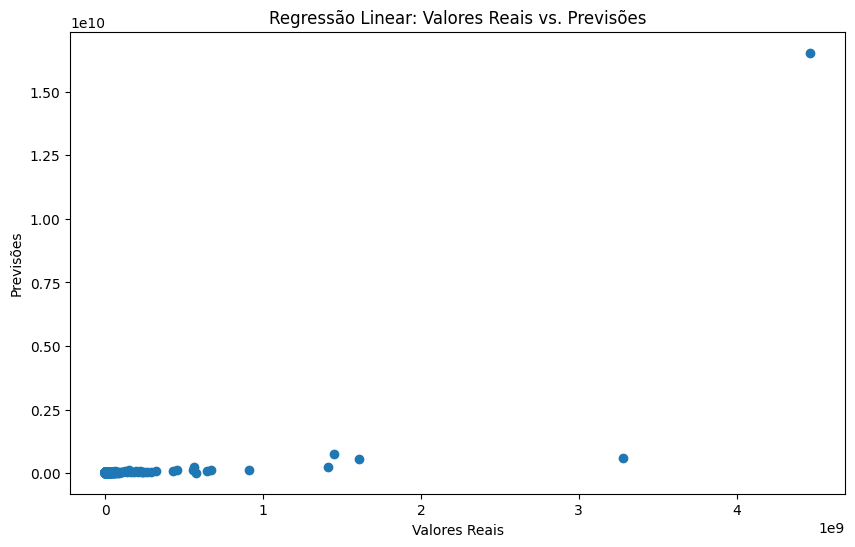

In [110]:
url = "/content/drive/MyDrive/solicitacoescredito.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar o arquivo CSV
dados = pd.read_csv(url)
colunas_para_media = ['margemBruta', 'faturamentoBruto', 'totalAtivo']

dados = dados.groupby('cnpjSemTraco')[colunas_para_media].mean().reset_index()
# Remover todas as colunas não numéricas

dados_numericos = dados.select_dtypes(include='number')
dados_numericos = dados_numericos.drop('margemBruta', axis=1)

dados_numericos = dados_numericos.fillna(dados_numericos.mean())

X = dados_numericos.drop('faturamentoBruto', axis=1)
y = dados_numericos['faturamentoBruto']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Erro Quadrático Médio:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Regressão Linear: Valores Reais vs. Previsões')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.show()

In [81]:
dados_numericos.shape

(2415, 2)

In [111]:
#Adicionando condições para classificar o porte de cada empresa
condicoes = [
(dados_numericos['faturamentoBruto'] <= 966916.5 ),
 (dados_numericos['faturamentoBruto'] <= 10962770.0),
 (dados_numericos['faturamentoBruto'] <= 4590082142.857142)

]

opcoes = ['pequena', 'media', 'grande']

dados_numericos['porte'] = pd.Series(np.select(condicoes, opcoes))

In [117]:
dados_numericos.head()

,faturamentoBruto,totalAtivo,porte
0,13097762.5,1.475942e+07,grande
1,2755596.5,1.022140e+08,media
2,2150965.8,1.218849e+06,media
3,6142262.6,8.814194e+06,media
4,2550429.0,8.683270e+05,media


In [130]:
dados_numericos.head()

,faturamentoBruto,totalAtivo,porte
0,13097762.5,1.475942e+07,grande
1,2755596.5,1.022140e+08,media
2,2150965.8,1.218849e+06,media
3,6142262.6,8.814194e+06,media
4,2550429.0,8.683270e+05,media


In [129]:
import pandas as pd
import joblib

# Carregar o modelo treinado
dados_teste = pd.DataFrame({
    'porte': [1] ,
    'totalAtivo': [150]
})

previsao = regressor.predict(dados_teste[['totalAtivo']])

print("Previsão para a terceira coluna:", previsao)

Previsão para a terceira coluna: [16936202.82250662]


In [137]:
def test_model(model, input_data):
   # Verificar se input_data é uma lista de listas, se não, transformá-lo em uma
   if not isinstance(input_data[0], list):
       input_data = [input_data]
   prediction = model.predict(input_data)
   return prediction

input_values = [[1068988.0], [ 548235000.0], [1928754.0]]  # Substitua pelos seus próprios valores

# Testando o modelo com os valores de entrada
for values in input_values:
    prediction = test_model(regressor, values)
    print("Valores de entrada:", values)
    print("Previsão de porte:", prediction)
    print()

Valores de entrada: [1068988.0]
Previsão de porte: [17258202.49682711]

Valores de entrada: [548235000.0]
Previsão de porte: [1.82098223e+08]

Valores de entrada: [1928754.0]
Previsão de porte: [17517216.83949815]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
